<a href="https://colab.research.google.com/github/thomas-g99/NBA_DRAFT_EVALUATION/blob/main/DATA_SCIENCE_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
import math
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from plotnine import *
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [ ]:
#reload data set everytime
NBA = pd.read_csv('draft-data-20-years.csv',index_col=False)
NBA.head()

,Unnamed: 0,Rk,Pk,Tm,Player,College,Yrs,G,TOTMP,TOTPTS,...,WS/48,BPM,VORP,DraftYr,MPG,PPG,RPG,APG,playerurl,DraftYear
0,1,1,1,BRK,Derrick Coleman,Syracuse,15.0,781.0,25903.0,12884.0,...,0.119,1.4,22.3,1990,33.2,16.5,9.3,2.5,https://www.sports-reference.com/cbb/players/d...,1990
1,2,2,2,OKC,Gary Payton,Oregon State,17.0,1335.0,47117.0,21813.0,...,0.148,3.3,62.5,1990,35.3,16.3,3.9,6.7,https://www.sports-reference.com/cbb/players/g...,1990
2,3,3,3,DEN,Mahmoud Abdul-Rauf,LSU,9.0,586.0,15628.0,8553.0,...,0.077,-0.8,4.5,1990,26.7,14.6,1.9,3.5,https://www.sports-reference.com/cbb/players/m...,1990
3,4,4,4,ORL,Dennis Scott,Georgia Tech,10.0,629.0,17983.0,8094.0,...,0.089,0.2,9.9,1990,28.6,12.9,2.8,2.1,https://www.sports-reference.com/cbb/players/d...,1990
4,5,5,5,CHA,Kendall Gill,Illinois,15.0,966.0,29481.0,12914.0,...,0.078,0.1,15.8,1990,30.5,13.4,4.1,3.0,https://www.sports-reference.com/cbb/players/k...,1990


In [ ]:
#data cleaning
NBA = NBA.dropna()
sig = NBA["G"] > 25
NBA = NBA.loc[sig]
Pick_perform = NBA.groupby(["Pk"])[["PPG","RPG","APG","G","BPM","WS/48"]].mean().round(2)
Pick_perform.head(30)


,PPG,RPG,APG,G,BPM,WS/48
Pk,,,,,,
1,17.91,7.06,3.59,612.64,1.71,0.12
2,13.85,5.68,3.21,643.68,0.29,0.10
3,15.54,5.25,3.28,660.44,1.10,0.11
4,13.36,5.49,2.91,665.86,0.15,0.10
5,13.63,4.67,3.19,707.00,-0.20,0.09
6,10.39,4.51,1.99,445.37,-1.04,0.08
7,12.19,4.59,2.64,614.74,-0.65,0.08
8,9.82,3.78,1.87,508.23,-1.36,0.07
9,9.60,4.59,1.95,528.75,-1.10,0.09


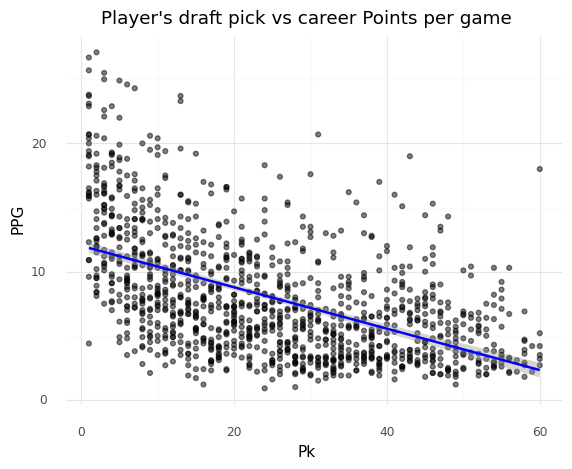

<ggplot: (8759065774893)>

In [ ]:
ggplot(NBA, aes(x='Pk',y='PPG')) + geom_point(alpha = 0.5) + theme_minimal() +geom_smooth(method = "lm", color = "blue") + ggtitle("Player's draft pick vs career Points per game")

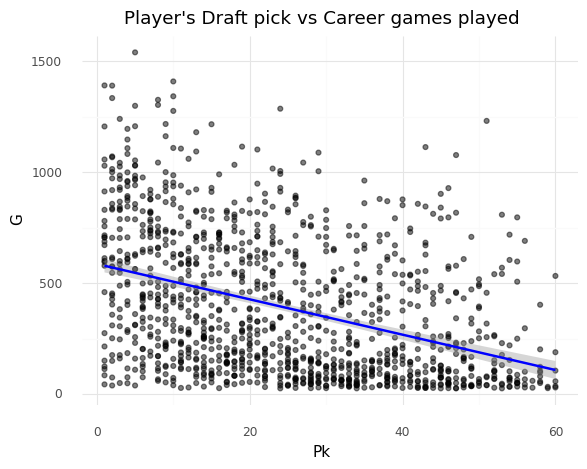

<ggplot: (8759049471229)>

In [ ]:
ggplot(NBA, aes(x="Pk",y="G")) + geom_point(alpha = 0.5) + theme_minimal() +geom_smooth(method = "lm", color = "blue") + ggtitle("Player's Draft pick vs Career games played")

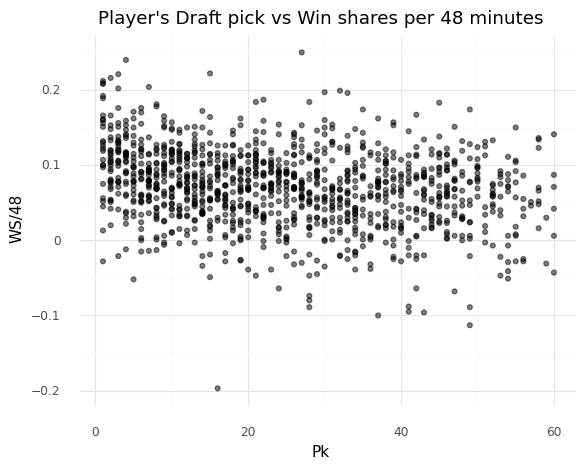

<ggplot: (8759048767441)>

In [ ]:
ggplot(NBA,aes(x="Pk",y="WS/48")) + geom_point(alpha=0.5) + theme_minimal() + ggtitle("Player's Draft pick vs Win shares per 48 minutes")

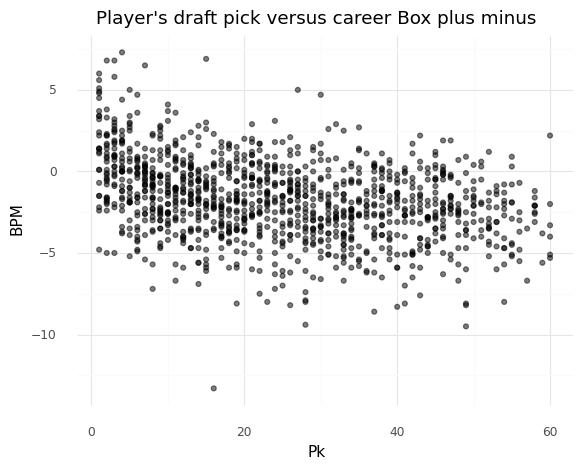

<ggplot: (8759048788105)>

In [ ]:
ggplot(NBA,aes(x="Pk",y="BPM")) + geom_point(alpha=0.5) + theme_minimal() + ggtitle("Player's draft pick versus career Box plus minus")

##Can we predict the draft pick of an NBA player given their career statistics?

In [ ]:
lr = LinearRegression()
np.random.seed(392)
features = ["G", "BPM", "PPG", "RPG", "APG", "Yrs","WS/48","FG%","3P%"]
predictors = NBA[features]
outcome = NBA[["Pk"]]
#predictors.head()
z = StandardScaler()
predictors = z.fit_transform(predictors)
X_train, X_test, y_train, y_test = train_test_split(predictors,outcome, test_size = 0.2)
lr.fit(X_train,y_train)
test_pred = lr.predict(X_test)
train_pred = lr.predict(X_train)
mse_test = mean_squared_error(y_test,test_pred)
mse_train = mean_squared_error(y_train,train_pred)
scr_test = lr.score(X_test,y_test)
scr_train = lr.score(X_train,y_train)
print("RMSE train:", math.sqrt(mse_train))
print("RMSE test:", math.sqrt(mse_test))
print("R^2 train:", scr_train)
print("R^2 test:", scr_test)

RMSE train: 12.464424942876006
RMSE test: 13.852699049771298
R^2 train: 0.33261584922321763
R^2 test: 0.31401779847349753


In [ ]:
NBA["predict"] = lr.predict(predictors).round(2)
NBA["Pick difference"] = NBA["Pk"] - NBA["predict"]
NBA.head()
Over_performer = NBA["Pick difference"].idxmax()
best = NBA.loc[Over_performer]
under = NBA["Pick difference"].idxmin()
worst = NBA.loc[under]
print(best)
print(worst)

Unnamed: 0                                                      1268
Rk                                                                60
Pk                                                                60
Tm                                                               SAC
Player                                                 Isaiah Thomas
College                                                   Washington
Yrs                                                             11.0
G                                                              533.0
TOTMP                                                        15344.0
TOTPTS                                                        9574.0
TOTTRB                                                        1300.0
TOTAST                                                        2614.0
FG%                                                            0.434
3P%                                                            0.362
FT%                               

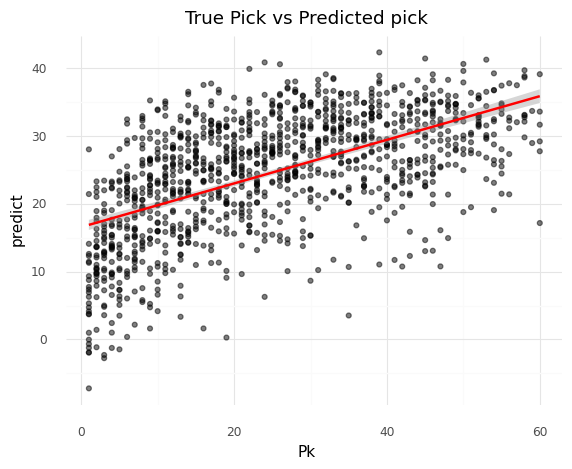

<ggplot: (8759046750665)>

In [ ]:
ggplot(NBA,aes("Pk","predict")) + geom_point(alpha=0.5) + theme_minimal() + geom_smooth(method="lm",color="red") + ggtitle("True Pick vs Predicted pick")

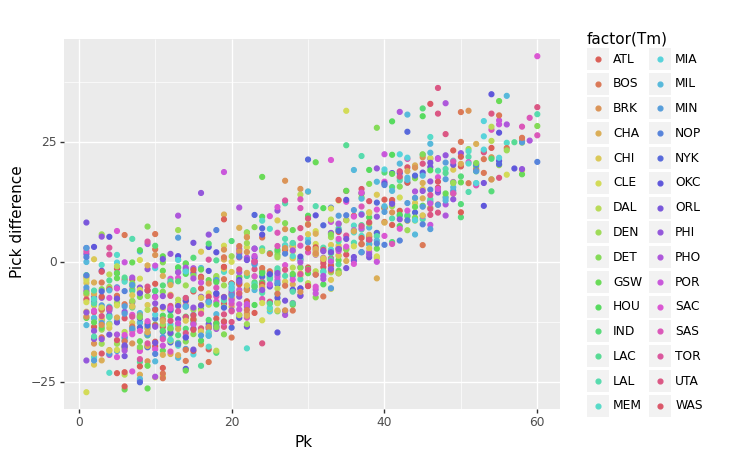

<ggplot: (8759046703705)>

In [ ]:
ggplot(NBA,aes("Pk","Pick difference",color="factor(Tm)")) + geom_point()

My linear model did not perform extremely well. It only covered about 33% of the varaince of the dataset and had a relatively high RMSE of about 13. But both of these values do make sense when looking at the totality of the data set.From my initial data exploration we see that our data set has a high amount of varaince and that there are so many different careers. This makes sense as there are many factors to describe a players career and success that are not in the data set. That explains the low r^2 value that was calcuated. I also think that the RMSE is not extremely concering as it less shows the inaccuracy of my model but just the unpredictabilty of a players career.

## Which statistics are the biggest factors when predicting the draft pick?

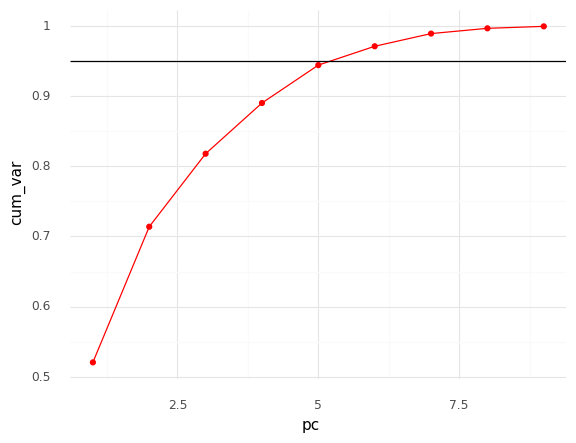

<ggplot: (8759046693221)>

In [ ]:
pca = PCA()
pca.fit(X_train)
pcaDF = pd.DataFrame({"expl_var" :
                      pca.explained_variance_ratio_,
                      "pc": range(1,10),
                      "cum_var":
                      pca.explained_variance_ratio_.cumsum()})

(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "red") + geom_point(color="red") + geom_hline(yintercept = 0.95) + theme_minimal())

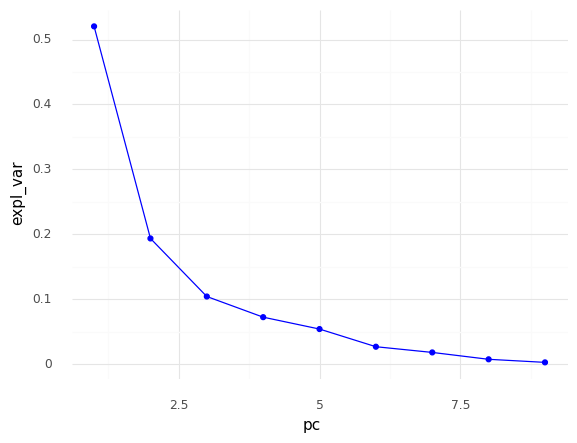

<ggplot: (8759041793029)>

In [ ]:
(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line(color = "blue") + geom_point(color="blue") + theme_minimal())

In [ ]:
pcomps = pca.transform(X_train)
pcomps1 = pca.transform(X_test)
pcomps = pd.DataFrame(pcomps[:,0:5])
pcomps1 = pd.DataFrame(pcomps1[:,0:5])
lr1 = LinearRegression()
lr1.fit(pcomps, y_train)
test_pred1 = lr1.predict(pcomps1)
train_pred1 = lr1.predict(pcomps)
print("Training R^2: ", lr1.score(pcomps,y_train))
print("Testing R^2: ", lr1.score(pcomps1,y_test))
print("Training RMSE: ", math.sqrt(mean_squared_error(y_train,train_pred1)))
print("Testing RMSE: ", math.sqrt(mean_squared_error(y_test,test_pred1)))


Training R^2:  0.3199690303126689
Testing R^2:  0.3195953855831317
Training RMSE:  12.58197008322365
Testing RMSE:  13.796267313532264


In [ ]:
loadings = pd.DataFrame({"loading": pca.components_.flatten(),
            "comp": np.repeat(range(1,10), 9 ,
        axis=0), "variable":np.tile(features,9) })

loadings.head(9)

,loading,comp,variable
0,0.388609,1,G
1,0.419723,1,BPM
2,0.373081,1,PPG
3,0.328535,1,RPG
4,0.268551,1,APG
5,0.374457,1,Yrs
6,0.381594,1,WS/48
7,0.243567,1,FG%
8,0.091730,1,3P%


I did a Partial Component Analysis to answer this questions in order to find the strongest factors in predicted what pick a player should go. My partial component analysis showed that 5 components were optimal for our model. I then created a table to find out which variables where the most important. I found those to be BPM, WS/48, G, Yrs, and PPG. The varaibles make sense as to being the most important as BPM and WS/48 are cumulative stats for a players career, Games and years are important to show the longevity of a player, and PPG being important as scoring is thehighest commodity in the Nba. After taking into account onyl these 5 factors my model's performance did not change significantly. This means that the PCA analysis was successful in narrowing down our variables to be more manageable, and found the most important factors in predicted the pick a player should have been selected.  

##What types of players overachieve vs underachieve. Which players overachieved for their pick the most? What do they have in common?

In [ ]:
features = ["BPM","WS/48","VORP","PPG","APG","RPG","FG%","3P%","Pick difference"]
X= NBA[features]
X=z.fit_transform(X)
km = KMeans(n_clusters = 4)
km.fit(X)
membership = km.predict(X)

NBA["cluster"] = membership
silhouette_score(X,membership)

0.207476453604264

In [ ]:
cluster_stat = NBA.groupby(["cluster"])["PPG","BPM","WS/48","APG","RPG","Pk","FG%","3P%","Pick difference"].mean()
cluster_stat

,PPG,BPM,WS/48,APG,RPG,Pk,FG%,3P%,Pick difference
cluster,,,,,,,,,
0,16.852555,2.189781,0.130730,4.115328,5.668613,10.773723,0.462000,0.333759,0.758832
1,6.721552,-1.579310,0.103983,0.832328,4.824138,23.642241,0.508397,0.130793,-1.057716
2,4.277929,-4.160218,0.018123,1.033243,1.802180,32.024523,0.393744,0.265946,1.049673
3,9.080000,-0.989663,0.078629,2.066292,3.254607,23.489888,0.437290,0.351297,-0.135573


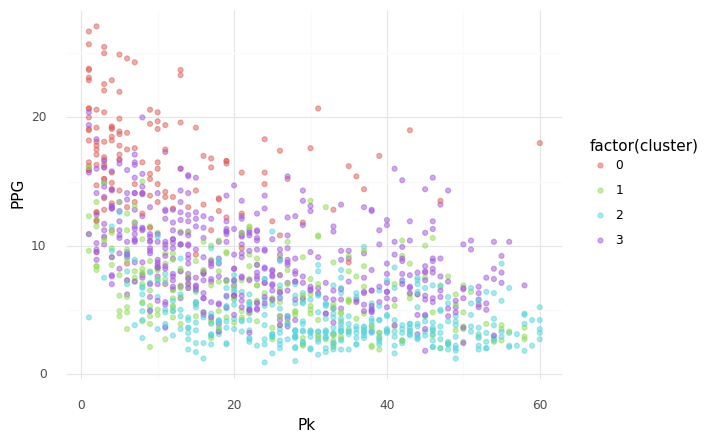

<ggplot: (8759041801313)>

In [ ]:
ggplot(NBA, aes(x='Pk',y='PPG',color = "factor(cluster)")) + geom_point(alpha = 0.5) + theme_minimal()

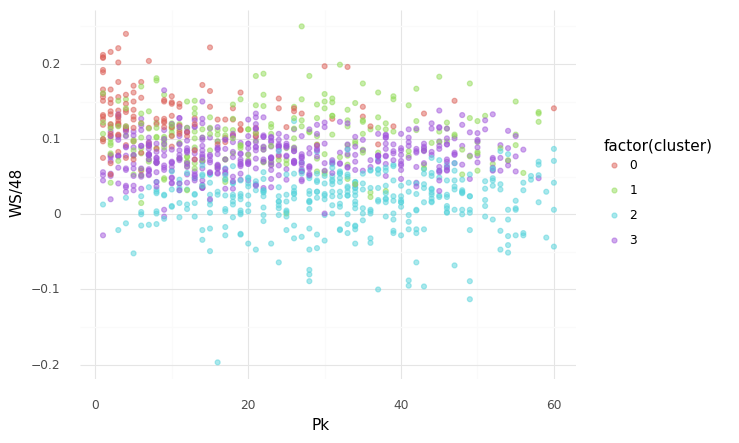

<ggplot: (8759041232841)>

In [ ]:
ggplot(NBA,aes(x="Pk",y="WS/48",color = "factor(cluster)")) + geom_point(alpha=0.5) + theme_minimal()

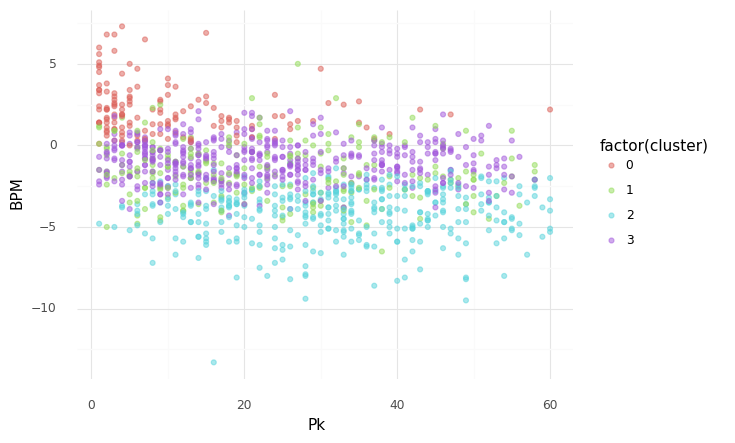

<ggplot: (8759041221337)>

In [ ]:
ggplot(NBA,aes(x="Pk",y="BPM",color = "factor(cluster)")) + geom_point(alpha=0.5) + theme_minimal()

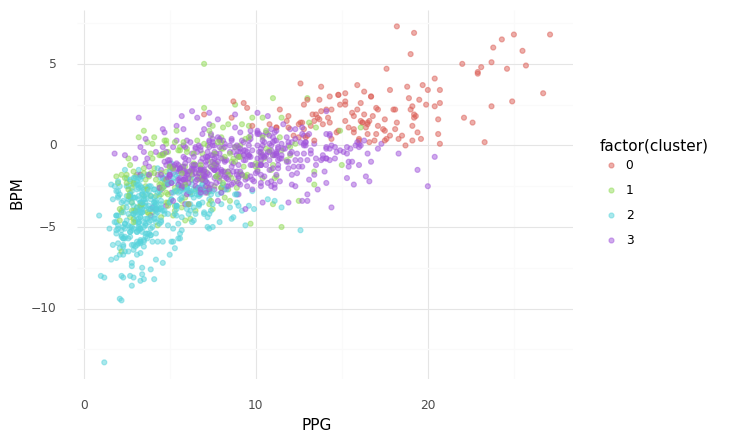

<ggplot: (8759041937973)>

In [ ]:
ggplot(NBA,aes(x="PPG",y="BPM",color = "factor(cluster)")) + geom_point(alpha=0.5) + theme_minimal()

From My kmeans model we see that some of the datapoints are harder to identify as clusters when we take compare to the pick they were taken in the draft. I chose 4 clusters for my model, it was a tough decision as there was not much seperation between datapoints, but I felt 4 clusters was appropriate. The silhouette score is only ~ 0.20 which is not great. But what is most telling from our clustering model is the average statistics of each cluster. I found that players were categorized properly into these 4 categories: high pick and high performance, higher pick and lower performance, lower pick and higher performance, and lower pick and lower performance. The kmeans helped me better understand the differences in the types of players that come out of this draft.

In [ ]:
# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null

# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# installing pypandoc
!pip install pypandoc

# connecting your google drive
from google.colab import drive
drive.mount('/content/drive')

# copying your file over. Change "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!cp "drive/My Drive/Colab Notebooks/DATA_SCIENCE_FINAL.ipynb" ./

# Again, replace "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!jupyter nbconvert --to PDF "DATA_SCIENCE_FINAL.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
pandoc set to manually installed.
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  javascript-common libcupsfilters1 libcupsimage2 libgs9 libgs9-common
  libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6 libpotrace0 libptexenc1
  libruby2.5 libsynctex1 libtexlua52 libtexluajit2 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended t

In [ ]:
from google.colab import drive
drive.mount('/content/drive')